In [2]:
import sys
sys.path.append('..\\..\\src')
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import pymc as pm
# import theano
# from theano import tensor as T

import pytensor.tensor as T
#import aesara
#from aesara import tensor as T
import change_point_tools as cp_Tools
from pymc.math import switch
import matplotlib.pyplot as plt
import arviz as az
import xarray as xr

In [3]:
import seaborn as sns

def changepoint_battery(data):
    prob_full_const = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=1000, p=.000001, method='full_cov', prior='const',  engine='numba', normal=True)
    prob_full_geo = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=1000, p=.0001, method='full_cov', prior='geometric',  engine='numba', normal=True)
    prob_gauss_const = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=1000, p=.000001, method='gauss', prior='const',  engine='numba', normal=True)
    prob_gauss_geo = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=1000, p=.0001, method='gauss', prior='geometric',  engine='numba', normal=True)
    # prob_ifm_const = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=1000, p=.000001, method='ifm', prior='const',  engine='numba', normal=True)
    # prob_ifm_geo = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=1000, p=.0001, method='ifm', prior='geometric',  engine='numba', normal=True)

    pelt = cp_Tools.pelt_bkps(data, pen=100, min_size=100)

    
    prob_list = [prob_full_const, prob_full_geo, prob_gauss_const, prob_gauss_geo]#, prob_ifm_const, prob_ifm_geo]
    prob_title = {  0 : 'uniform   prior | full cov  method', 
                1 : 'geometric prior | full cov  method', 
                2 : 'uniform   prior | gaussian method', 
                3 : 'geometric prior | gaussian method'}
                # 4 : 'uniform   prior |     ifm   method', 
                # 5 : 'geometric prior |     ifm   method'} 

    pelt
    plt.rcParams['font.family'] = 'serif'
    #plt.rcParams["font.monospace"] = ["Courier"]
    #plt.style.use('ggplot')
    #plt.font('courier')
    sns.set_style('darkgrid')
    x = np.arange(len(data))
    fig, ax = plt.subplots(5,1, figsize=(14,9), layout='constrained', sharex=True)
    #fig.tight_layout()
    ax[0].set_xlim(-20,1270)
    ax[2].set_ylabel('Change-point Probability', loc='center')
    #plt.figure(figsize=(12,4))
    ax[0].set_xticks([0,250,500,750,1000])
    #plt.figure(figsize=(12,4))
    '''pelt Changepoints in each block'''
    # for i in pelt[::-1][1:]:
    #     for j in range(len(prob_list)):
            
    #         ax[j].axvline(i, color='red', alpha=0.7)
    ax[4].plot(cp_Tools.normalize_array(data,0,0), color='k', alpha=0.4)
    #for j in range(len(prob_list)):
    for i in pelt[::-1][1:]:
        if i == pelt[1]:
            ax[4].axvline(i, color='red', alpha=0.5, label='PELT method')
        else:
            ax[4].axvline(i, color='red', alpha=0.5)
    ax[4].legend(loc='center right', bbox_to_anchor=(.964,.51))
    for p in range(len(prob_list)):
    # for q in prob_title:
        sns.lineplot((prob_list[p]), label=prob_title[p], ax=ax[p], color='b', alpha=0.7)
        sns.lineplot(cp_Tools.normalize_array(data,0,0), ax=ax[p], color='k', alpha=0.4, label='dataseries')
        ax[p].legend(loc='center right')



   
    #ax[6].axvline(40, color='red', alpha=0.7)
    #ax[6].axvline(140, color='red', alpha=0.7)
    #ax[6].set_title('True Change Points t=40 & t=140')
    ax[4].set_xlabel('dataseries index (t)')
    fig.suptitle('Offline Bayesian Change Point analysis for one change-point dataseries: priors and methods comparison', fontsize=16)
    fig.savefig('..//..//reports/figures//Comparision_oneCP_offline_bayes_pelt.jpg')
    fig.savefig('..//..//reports/figures//Comparision_oneCP_offline_bayes_pelt.svg')


    



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


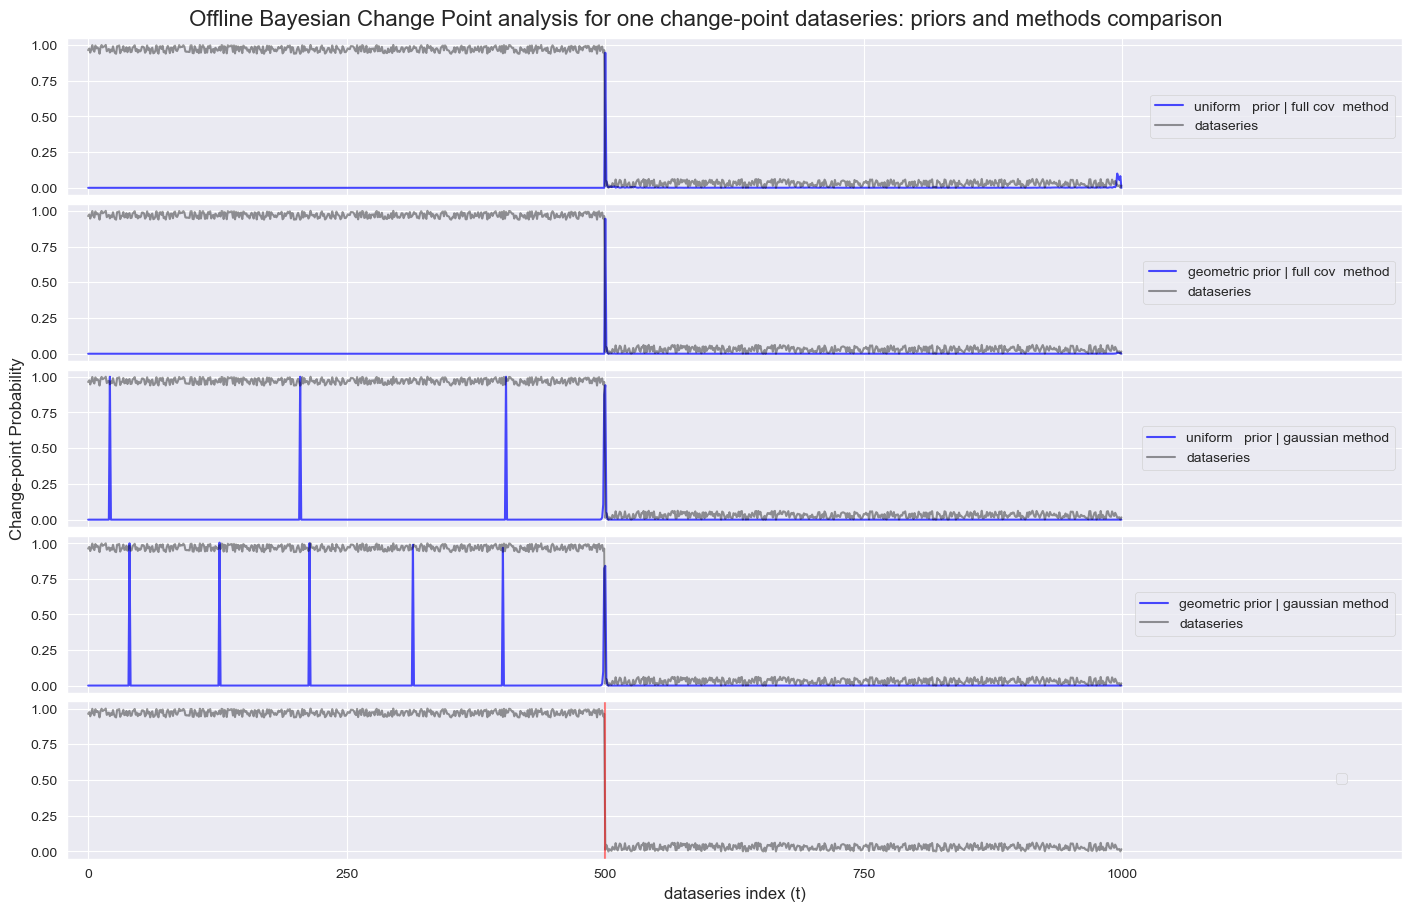

In [7]:
nochangepoint = np.linspace(0,1000,1000)
random1000 = np.random.random_sample(1000)
onechangepoint =np.concatenate((np.linspace(350,350,500), np.linspace(200,200,500)))+10*random1000
#plt.plot(onechangepoint)

changepoint_battery(onechangepoint)
plt.savefig('..//..//reports/figures//one_CP_offline_bayes_pelt.svg')

NameError: name 'fig' is not defined

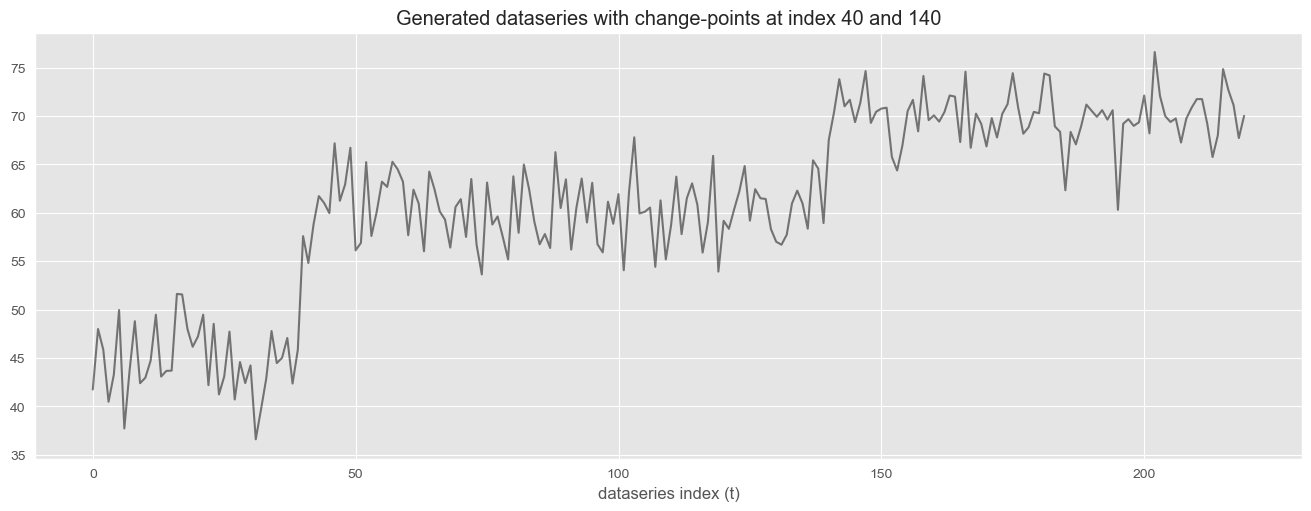

In [5]:
plt.figure(figsize=(13,5), layout='constrained')
np.random.seed(123) #initialize random seed
size1 = 40 #size of first part (number of points)
size2 = 100 #size of second part (number of points)
size3 = 80 #size of third part (number of points)
N = size1+size2+size3 #total number of points
scale = 3 #standard deviation of distribution function across all three parts
loc1 = 45 #mean of normal for first part
loc2 = 60 #mean of normal for second part
loc3 = 70 #mean of normal for third part
d1 = norm.rvs(loc=loc1,size=size1,scale=scale) #randomly generates points for first part
d2 = norm.rvs(loc=loc2,size=size2,scale=scale) #randomly generates points for second part
d3 = norm.rvs(loc=loc3,size=size3,scale=scale) #randomly generates points for third part
data = np.hstack([d1,d2,d3]) #these are our final observation points
#data
plt.style.use('ggplot')
plt.title('Generated dataseries with change-points at index 40 and 140')
plt.xlabel('dataseries index (t)')

plt.plot(data, color='k', alpha=0.5, label = 'dataseries') #let's have a look at our data
fig.savefig('..//..//reports/figures//Comparision_bayes_vs_PELT_raw_data.jpg')
fig.savefig('..//..//reports/figures//Comparision_bayes_vs_PELT_raw_data.svg')

In [ ]:
prob_full_const = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=900, p=.000001, method='full_cov', prior='const',  engine='numba', normal=True)
prob_full_geo = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=900, p=.0001, method='full_cov', prior='geometric',  engine='numba', normal=True)
prob_gauss_const = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=900, p=.000001, method='gauss', prior='const',  engine='numba', normal=True)
prob_gauss_geo = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=900, p=.0001, method='gauss', prior='geometric',  engine='numba', normal=True)
#prob_ifm_const = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=900, p=.000001, method='ifm', prior='const',  engine='numba', normal=True)
#prob_ifm_geo = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=900, p=.0001, method='ifm', prior='geometric',  engine='numba', normal=True)

pelt = cp_Tools.pelt_bkps(data, pen=20, min_size=10)

In [ ]:
prob_list = [prob_full_const, prob_full_geo, prob_gauss_const, prob_gauss_geo]
prob_title = {  0 : 'uniform   prior | full cov  method', 
                1 : 'geometric prior | full cov  method', 
                2 : 'uniform   prior | gaussian method', 
                3 : 'geometric prior | gaussian method'}
                # 4 : 'uniform   prior |     ifm   method', 
                # 5 : 'geometric prior |     ifm   method'} 

pelt

[15, 25, 40, 60, 140, 185, 200, 220]

Text(0.5, 0.98, 'Offline Bayesian Search methods (blue), Compared to PELT method (red) : label key =("prior" | "method")')

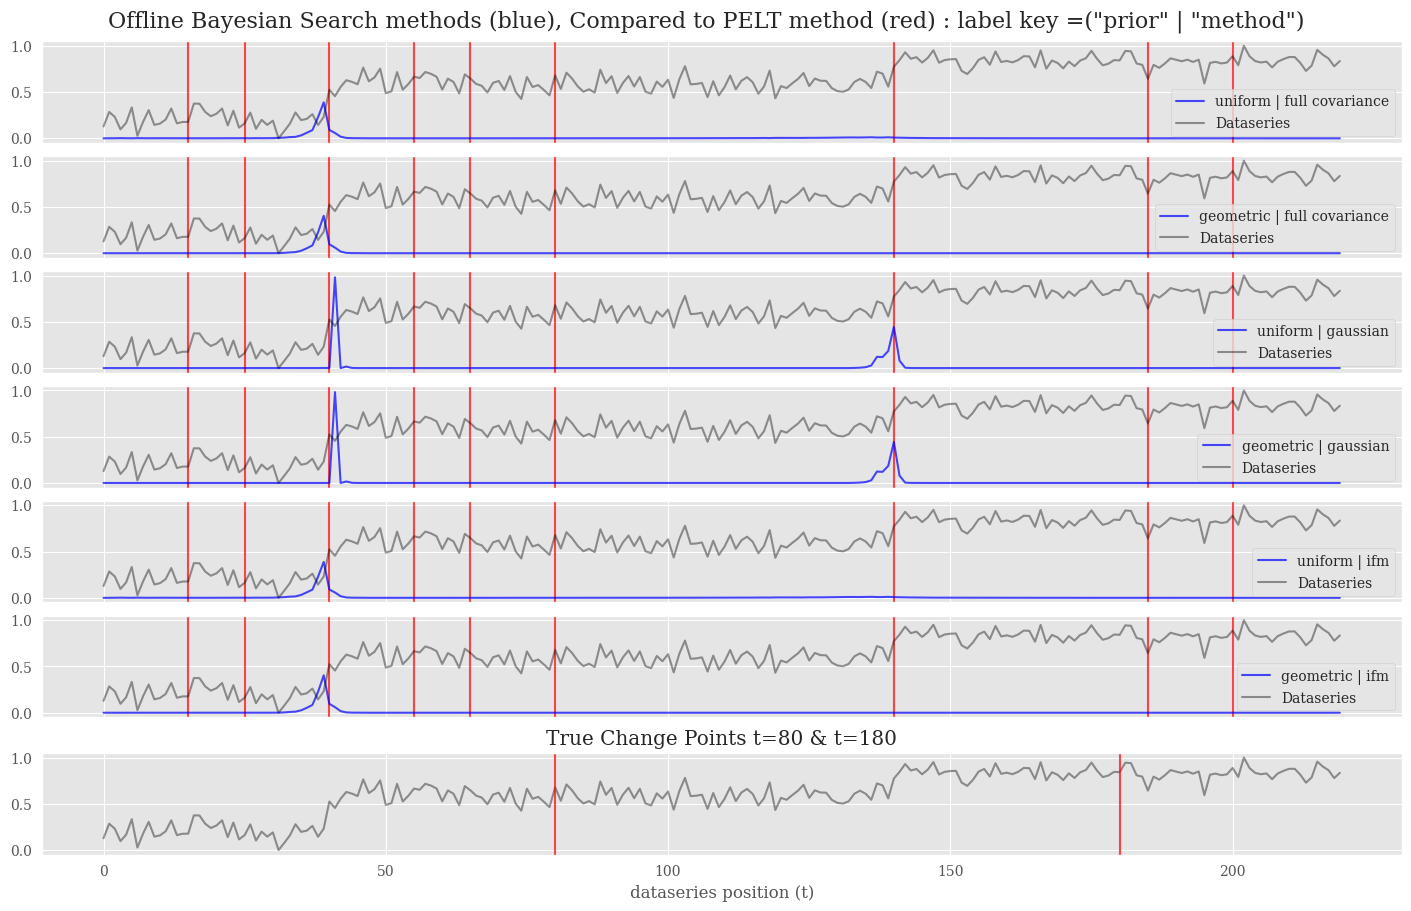

In [ ]:
import seaborn as sns

plt.rcParams['font.family'] = 'serif'
#plt.rcParams["font.monospace"] = ["Courier"]
plt.style.use('ggplot')
#plt.font('courier')
#sns.set_style('darkgrid')
x = np.arange(len(data))
fig, ax = plt.subplots(7,1, figsize=(14,9), layout='constrained', sharex=True)
#fig.tight_layout()

#plt.figure(figsize=(12,4))
for i in pelt[::-1][1:]:
    for j in range(len(prob_list)):
        
        ax[j].axvline(i, color='red', alpha=0.7)
for p in range(len(prob_list)):
   # for q in prob_title:
    sns.lineplot((prob_list[p]), label=prob_title[p], ax=ax[p], color='b', alpha=0.7)
    sns.lineplot(cp_Tools.normalize_array(data,0,0), ax=ax[p], color='k', alpha=0.4, label='Dataseries')
    ax[p].legend(loc='lower right')



ax[3].plot(cp_Tools.normalize_array(data,0,0), color='k', alpha=0.4)
ax[3].axvline(40, color='red', alpha=0.7)
ax[3].axvline(140, color='red', alpha=0.7)
ax[3].set_title('True Change Points t=40 & t=140')
ax[3].set_xlabel('dataseries position (t)')
fig.suptitle('Offline Bayesian Search methods (blue), Compared to PELT method (red) : label key =("prior" | "method")', fontsize=16)





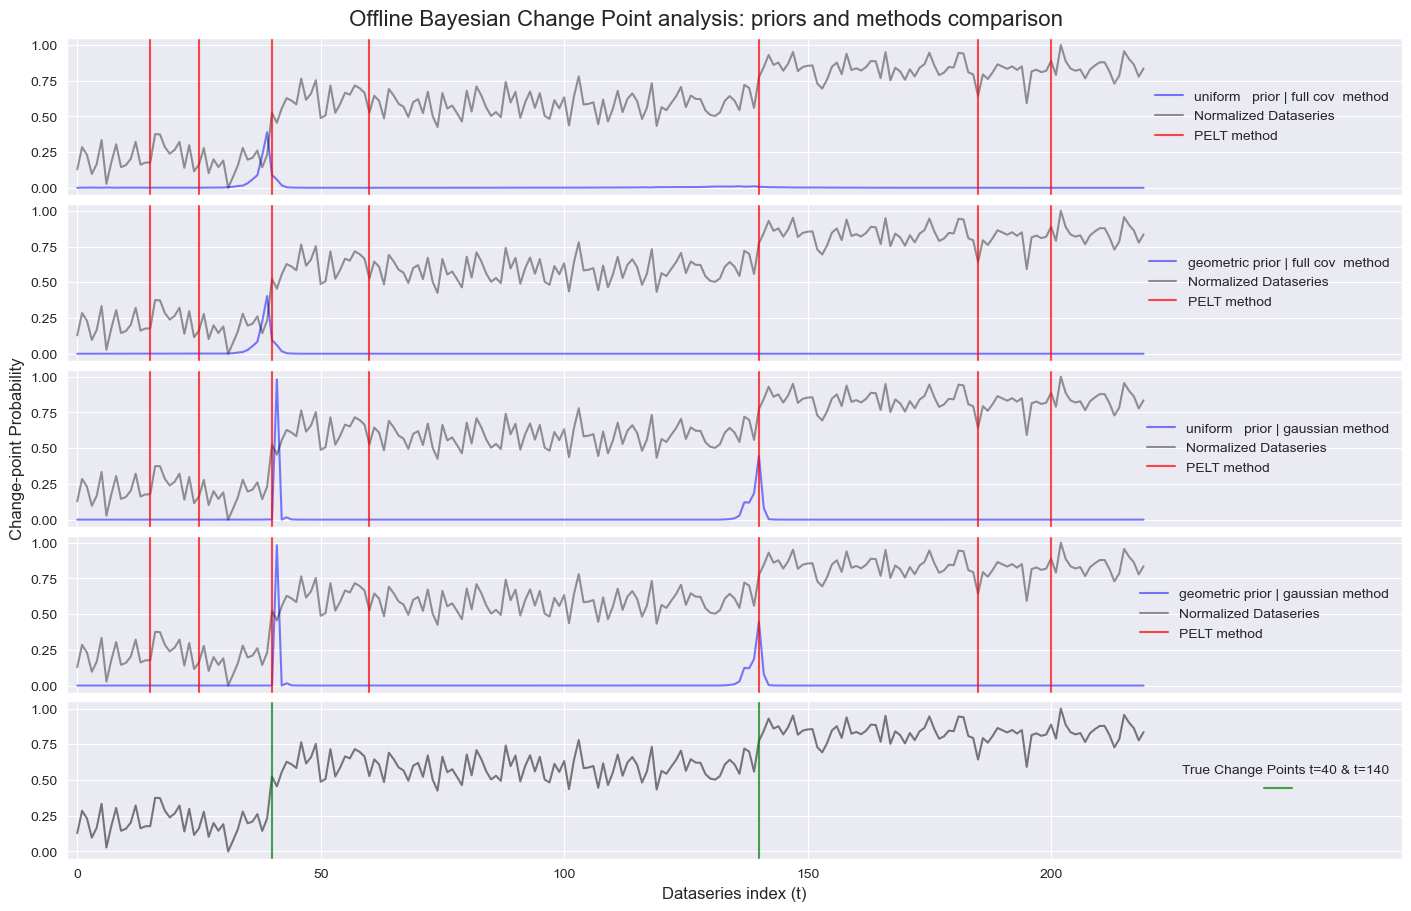

In [ ]:
import seaborn as sns
#plt.style.use('ggplot')
sns.set_style('darkgrid')
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams["font.monospace"] = ["Courier"]
#plt.style.use('ggplot')
x = np.arange(len(data))
fig, ax = plt.subplots(5,1, figsize=(14,9), layout='constrained', sharex=True)
#fig.tight_layout()
ax[0].set_xlim(-2,272)
ax[2].set_ylabel('Change-point Probability', loc='center')
#plt.figure(figsize=(12,4))
ax[0].set_xticks([0,50,100,150,200])
for p in range(len(prob_list)):
   # for q in prob_title:
    sns.lineplot((prob_list[p]), label=prob_title[p], ax=ax[p], color='b', alpha=0.5)
    sns.lineplot(cp_Tools.normalize_array(data,0,0), ax=ax[p], color='k', alpha=0.4, label='Normalized Dataseries')
    for i in pelt[::-1][1:]:
        if i == pelt[0]:
            ax[p].axvline(i, color='red', alpha=0.7, label='PELT method')
        else:
            ax[p].axvline(i, color='red', alpha=0.7)
    ax[p].legend(loc='center right', frameon=False)#, bbox_to_anchor=(.1,.1,.1,.01))

# for i in pelt[::-1][1:]:
#     for j in range(len(prob_list)):
#         if i == pelt[0]:
#             ax[j].axvline(i, color='red', alpha=0.7, label='PELT')
#         else:
#             ax[j].axvline(i, color='red', alpha=0.7)

ax[4].plot(cp_Tools.normalize_array(data,0,0), color='k', alpha=0.5)
ax[4].axvline(40, color='green', alpha=0.7, label=' ')
ax[4].axvline(140, color='green', alpha=0.7)#, label='True Change Points t=80 & t=180')
ax[4].legend(loc='center right', title='True Change Points t=40 & t=140', frameon=False)
ax[4].set_xlabel('Dataseries index (t)')
fig.suptitle('Offline Bayesian Change Point analysis: priors and methods comparison', fontsize=16)
fig.savefig('..//..//reports/figures//Comp_vary_offline_bayes_pelt.jpg')
fig.savefig('..//..//reports/figures//Comp_vary_offline_bayes_pelt.svg')
#plt.legend(title='Block length', bbox_to_anchor=(1.01, .81), borderaxespad=0)


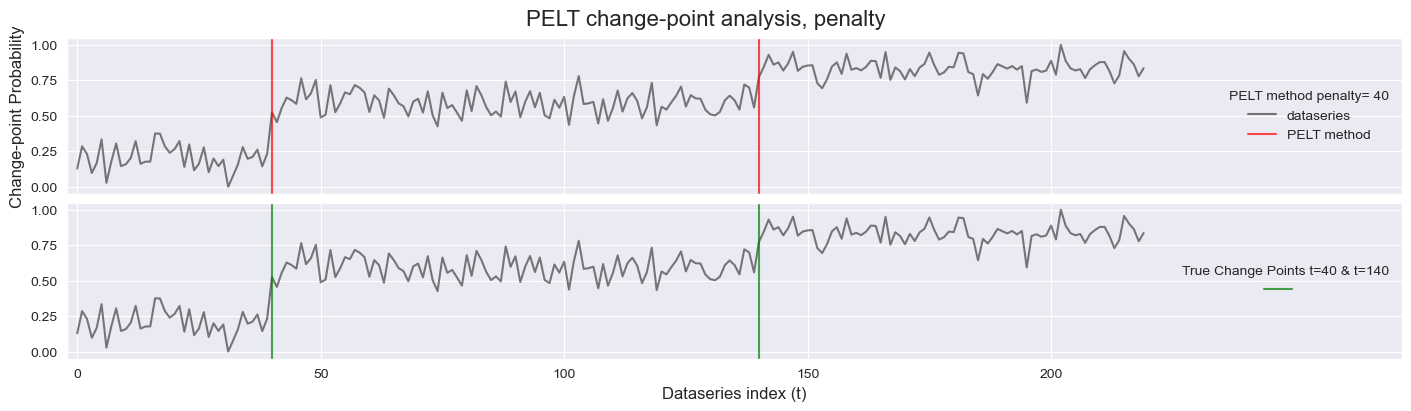

In [ ]:
pelt = cp_Tools.pelt_bkps(data, pen=40, min_size=10)
sns.set_style('darkgrid')
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams["font.monospace"] = ["Courier"]
#plt.style.use('ggplot')
x = np.arange(len(data))
fig, ax = plt.subplots(2,1, figsize=(14,4), layout='constrained', sharex=True)
#fig.tight_layout()
ax[0].set_xlim(-2,272)
ax[0].set_ylabel('Change-point Probability', loc='center')
#plt.figure(figsize=(12,4))
ax[1].set_xticks([0,50,100,150,200])
ax[0].plot(cp_Tools.normalize_array(data,0,0), color='k', alpha=0.5, label='dataseries')
ax[0].legend(loc='center right', title='PELT method penalty= 40', frameon=False)
for i in pelt[::-1][1:]:
    if i == pelt[0]:
        ax[0].axvline(i, color='red', alpha=0.7, label='PELT method')
    else:
        ax[0].axvline(i, color='red', alpha=0.7)
ax[0].legend(loc='center right', title='PELT method penalty= 40', frameon=False)
ax[1].plot(cp_Tools.normalize_array(data,0,0), color='k', alpha=0.5)
ax[1].axvline(40, color='green', alpha=0.7, label=' ')
ax[1].axvline(140, color='green', alpha=0.7)#, label='True Change Points t=80 & t=180')
ax[1].legend(loc='center right', title='True Change Points t=40 & t=140', frameon=False)
ax[1].set_xlabel('Dataseries index (t)')
fig.suptitle('PELT change-point analysis, penalty', fontsize=16)
fig.savefig('..//..//reports/figures//Comp_vary_offline_bayes_pelt40.jpg')
fig.savefig('..//..//reports/figures//Comp_vary_offline_bayes_pelt40.svg')

In [ ]:
''' The next three cells will take quite some time to compute, 60+ minutes in previous attempts

It will compute the probability of a normalized curve for change points in the dataset, and this is used to display the
relative importance for tuning the Bayesian changepoint algorithm for not only completeness of the solution i.e. find all 
the useful changepoints, but also to not "overspend" on the computing time to achieve this.

As a practical limitation for the framework, a great deal of this computation time can be handled in a step before the
active analysis of input data, but this step will grow proportionally with the increase in input data.'''

import welly
path = '..\\..\\data\\raw\\volve_well_data\\'
f1 = welly.Well.from_las(path + '15_9-F-1\\15_9_F1_complete.las')
df_f1 = f1.df(['PEF'])
df_f1clip = df_f1[2620:3590]
#df_f1clip[['CP_Prob_RHOB','CP_Prob_PEF']].plot(alpha=0.7)
#plt.plot(cp_Tools.normalize_array(df_f1clip['PEF'],0,0))
PEF_seg_1000 = cp_Tools.bayes_offline_split(cp_Tools.normalize_array(df_f1clip['PEF'].values,0,0), segment_length=1000, method='full_cov', prior='const', engine='numba', normal=True)





c:\Users\ada55080\.conda\envs\sdt\lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


method- full_cov, prior- const, engine- numba
Segmenting into 1000
/nmpleted segment 10 from 9000: 9700 of 9700

In [ ]:
PEF_seg_3000 = cp_Tools.bayes_offline_split(cp_Tools.normalize_array(df_f1clip['PEF'].values,0,0), segment_length=3000, method='full_cov', prior='const', engine='numba', normal=True)


method- full_cov, prior- const, engine- numba
Segmenting into 3000
/nmpleted segment 4 from 9000: 9700 of 9700

In [ ]:
PEF_seg_6000 = cp_Tools.bayes_offline_split(cp_Tools.normalize_array(df_f1clip['PEF'].values,0,0), segment_length=6000, method='full_cov', prior='const', engine='numba', normal=True)


method- full_cov, prior- const, engine- numba
Segmenting into 6000
/nmpleted segment 2 from 6000: 9700 of 9700

In [ ]:
PEF_ = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(df_f1clip['PEF'].values,0,0), method='full_cov', prior='const', engine='numba', normal=True)

In [ ]:
# Plotting the resuts from the cell above

sns.set_style('darkgrid')
fig, ax = plt.subplots(2, figsize=(12,5), sharex=True, layout='constrained')
ax[0].set_xlim(-100,12200)
ax[0].plot(PEF_seg_1000+3, alpha=0.9, label='1000')
ax[0].plot(PEF_seg_3000+2, alpha=0.9, label='3000')
ax[0].plot(PEF_seg_6000+1, alpha=0.9, label='6000')
ax[1].set_xlabel('Dataseries index (t)')
ax[0].set_xticks([0,2000,4000,6000,8000,9700])
ax[0].set_yticks([])
ax[1].set_yticks([0,.5,1])
ax[0].set_ylabel('Change-point Probability')
#plt.yscale([])
#plt.plot(cp_Tools.normalize_array(df_f1clip['PEF'],0,0))
ax[0].plot(PEF_, alpha=0.8, label='Full Sequence ~9700')
ax[1].plot(cp_Tools.normalize_array(df_f1clip['PEF'].to_numpy(),0,0), color='green', label=' ', alpha=1)#, label='Normalized Dataseries')
ax[1].legend(loc='center right', fontsize=10,frameon=False, title='Normalized Dataseries', bbox_to_anchor=(.964,.51))
ax[0].legend(loc='center right', title='Probability analysis: Segment Size', fontsize=9, frameon=False)
#plt.axhline(2.21, alpha=.11)
fig.suptitle('Effect of calculation segment size for offline Bayesian changepoint calculations');
plt.savefig('..//..//reports/figures//effect_bayes_off_segment_size.jpg')
plt.savefig('..//..//reports/figures//effect_bayes_off_segment_size.svg')

NameError: name 'sns' is not defined